<img src = "./resources/images/banner_2.jpeg" alt = "Encabezado MLDS" width = "100%">  </img>

# **Entendimiento y Preparación de los Datos**
---

## **0. Integrantes del equipo de trabajo**
---

<table><thead>
  <tr>
    <th>#</th>
    <th>Integrante</th>
    <th>Documento de identidad</th>
  </tr></thead>
<tbody>
  <tr>
    <td>1</td>
    <td>Diego Alejandro Feliciano Ramos</td>
    <td>1024586904</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Ivonne Cristina Ruiz Páez</td>
    <td>1014302058</td>
  </tr>
</tbody>
</table>

## **1. Análisis Exploratorio de los Datos**
---

### **1.1. Resumen General**
---

In [ ]:
#Carga de datos
%pip install medmnist
%pip install ydata-profiling

In [44]:
from medmnist import PneumoniaMNIST
from ydata_profiling import ProfileReport

import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
train_set = PneumoniaMNIST(split="train", download=True)
val_set = PneumoniaMNIST(split="val", download=True)
test_set = PneumoniaMNIST(split="test", download=True)

Using downloaded and verified file: /Users/diegof/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /Users/diegof/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /Users/diegof/.medmnist/pneumoniamnist.npz


In [46]:
train_set.info

{'python_class': 'PneumoniaMNIST',
 'description': 'The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384−2,916)×(127−2,713). We center-crop the images and resize them into 1×28×28.',
 'url': 'https://zenodo.org/records/10519652/files/pneumoniamnist.npz?download=1',
 'MD5': '28209eda62fecd6e6a2d98b1501bb15f',
 'url_64': 'https://zenodo.org/records/10519652/files/pneumoniamnist_64.npz?download=1',
 'MD5_64': '8f4eceb4ccffa70c672198ea285246c6',
 'url_128': 'https://zenodo.org/records/10519652/files/pneumoniamnist_128.npz?download=1',
 'MD5_128': '05b46931834c231683c68f40c47b2971',
 'url_224': 'https://zenodo.org/records/10519652/files/pneumoniamnist_224.npz?download=1',
 'MD5_224': 'd6a3c71de1b94

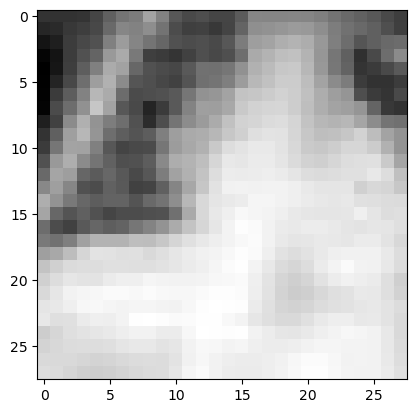

In [47]:
plt.imshow(train_set.imgs[4707], cmap = 'gray')

Usando las salidas de las celdas de código ejecutadas anteriormente se puede observar que el conjunto de datos que estamos analizando contiene un total de 5856 muestras, que se distribuyen en tres subconjuntos principales. Específicamente, el conjunto de entrenamiento incluye 4,708 imágenes, mientras que el conjunto de validación cuenta con 524 muestras y el conjunto de prueba tiene 624 imágenes. Esta organización es fundamental para evaluar el rendimiento del modelo de clasificación, ya que permite validar y ajustar el modelo sin sobreajustar a los datos de entrenamiento.

En cuanto al formato de los datos, estos están almacenados en archivos con extensión .npz, que son comúnmente utilizados para almacenar datos de NumPy. Cada imagen en el conjunto es de escala de grises y ha sido preprocesada para tener un tamaño uniforme de 1x28x28 píxeles, lo que facilita su manejo y análisis en el contexto de modelos de aprendizaje automático. Este preprocesamiento asegura que todas las entradas al modelo tengan la misma dimensión.

<img src = "./resources/images/pneumonia_size.png" alt = "Dataset" width = "100%">  </img>

Respecto al tamaño de los archivos, se observan varios archivos relacionados con el conjunto "pneumoniamnist", cada uno con diferentes tamaños que reflejan la cantidad de datos que contienen. Por ejemplo, el archivo más pequeño, pneumoniamnist.npz, ocupa 4.2 MB, mientras que el archivo más grande, pneumoniamnist_224.npz, tiene un tamaño considerable de 214.4 MB. Este último sugiere que contiene una mayor cantidad de imágenes o datos adicionales, lo que podría ser útil en diferentes contextos de modelado, aunque para efectos prácticos se usará pneumoniamnist.npz.

### **1.2. Resumen de la Calidad de los datos**
---

En términos de calidad de los datos, se realizó un análisis exhaustivo para garantizar que no hubiera ausencias significativas. Con esto, se puede evidenciar que no se detectaron datos faltantes lo que es un indicativo positivo, ya que asegura que el conjunto esté completo y listo para el análisis, lo que evita falta de información que podría conducir a resultados sesgados o poco confiables.

Asimismo, no se encontraron documentos ilegibles o problemas de codificación que pudieran interferir con el procesamiento de las imágenes. Todos los datos están bien formados, lo que sugiere que el proceso de recolección y preprocesamiento se llevó a cabo de manera adecuada. Además, se verificó que no existiera diversidad de formatos que pudiera complicar la consistencia de los datos.

Finalmente, el análisis de los tres conjuntos de datos: Train (entrenamiento), Val (validación) y Test (prueba) reveló que la mediana para los tres conjuntos es aproximadamente 150, lo que indica que los datos tienen una distribución similar en los tres grupos, además, la variabilidad (tamaño de la caja) es similar para los conjuntos de entrenamiento, validación y prueba cosa que sugiere que los tres conjuntos tienen una estructura de datos comparable en términos de dispersión; adicionalmente, se observan outliers (puntos negros) en los tres conjuntos, pero parecen ser más prominentes en los conjuntos Test y Val; estos puntos están ubicados fuera del rango esperado (1.5 veces el IQR), lo que indica que hay valores en esos conjuntos que son significativamente diferentes del resto de los datos. Por último, se puede afirmar que no hay valores atípicos ni duplicados en el conjunto de datos, lo que es un excelente indicador de calidad. La ausencia de estos problemas permite avanzar hacia la fase de modelado sin la necesidad de realizar correcciones adicionales, lo que puede ahorrar tiempo y recursos.

In [48]:
train_imgs = train_set.imgs
train_imgs = train_imgs.reshape(len(train_imgs), 28*28)
train_imgs = pd.DataFrame(train_imgs)
train_imgs['y'] = train_set.labels

val_imgs = val_set.imgs
val_imgs = val_imgs.reshape(len(val_imgs), 28*28)
val_imgs = pd.DataFrame(val_imgs)
val_imgs['y'] = val_set.labels

test_imgs = test_set.imgs
test_imgs = test_imgs.reshape(len(test_imgs), 28*28)
test_imgs = train_set.labels = pd.DataFrame(test_imgs)
test_imgs['y'] = test_set.labels

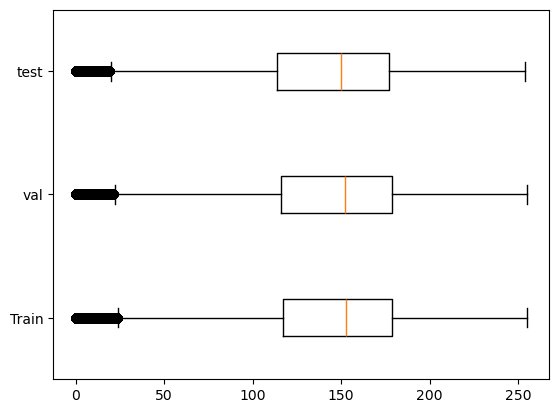

In [49]:
values = [train_imgs.to_numpy()[:,:-1].flatten(),
          val_imgs.to_numpy()[:,:-1].flatten(),
          test_imgs.to_numpy()[:,:-1].flatten()]

plt.boxplot(values, vert=False, tick_labels=['Train', 'val', 'test'])
plt.show()

In [50]:
data = pd.concat((train_imgs, val_imgs, test_imgs), axis= 0)
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,y
count,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,...,5856.000000,5856.000000,5856.000000,5856.000000,5856.00000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000
mean,93.207480,96.234631,98.555328,100.755294,103.830943,107.501878,114.193818,121.998463,133.286714,143.901469,...,181.483607,179.348531,177.191769,174.231045,170.94194,165.663764,157.869023,145.396175,131.801571,0.729679
std,45.403106,45.745984,47.075998,48.506769,50.514265,52.669010,53.114405,53.774484,50.617289,45.746411,...,28.486689,29.255247,29.853813,30.009183,30.74570,32.423286,36.856290,44.508211,53.755609,0.444164
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,62.000000,64.000000,66.000000,67.000000,68.000000,76.000000,85.000000,101.000000,116.000000,...,168.000000,166.000000,163.000000,160.000000,156.00000,150.000000,142.000000,128.000000,109.000000,0.000000
50%,93.000000,97.000000,100.000000,102.000000,106.000000,111.000000,119.000000,130.000000,141.000000,150.000000,...,185.000000,184.000000,183.000000,180.000000,177.00000,172.000000,165.000000,155.000000,147.000000,1.000000
75%,127.000000,131.000000,133.000000,137.000000,142.000000,149.000000,156.000000,163.000000,171.000000,178.000000,...,199.000000,198.000000,196.000000,194.000000,192.00000,188.000000,183.000000,176.000000,171.000000,1.000000
max,243.000000,238.000000,242.000000,238.000000,236.000000,237.000000,245.000000,249.000000,251.000000,255.000000,...,255.000000,252.000000,249.000000,247.000000,246.00000,251.000000,236.000000,242.000000,234.000000,1.000000


### **1.3. Tipos de variables**
---

El conjunto de datos que estamos utilizando tiene una variable objetivo claramente definida: las etiquetas de clasificación de las imágenes. Estas etiquetas son categóricas, representando dos clases: "Normal" y "Neumonía". La naturaleza binaria de esta clasificación es fundamental para el desarrollo del modelo, ya que guía la forma en que se entrenará y evaluará el rendimiento del modelo.

Aunque no se presentó un análisis detallado de la distribución de las etiquetas en esta fase, sería recomendable realizar un conteo de las imágenes por clase para verificar si existe un desbalance significativo. Un desbalance en las clases podría complicar el entrenamiento del modelo y hacer que este se incline hacia la clase mayoritaria. Además, el conjunto de datos se compone únicamente de imágenes y sus etiquetas, sin variables adicionales que pudieran influir en el análisis.

In [51]:
prof = ProfileReport(data, minimal=True)
prof.to_file(output_file='./resources/data/report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### **1.4. Relación Entre Variables**
---

La matriz de correlación generada proporciona una valiosa visión sobre la relación entre los píxeles de las imágenes. Esta matriz revela que ciertos grupos de píxeles tienden a comportarse de manera similar, lo que indica que existen correlaciones significativas entre ellos, cosa que es de suma importancia porque podría guiarnos a identificar características relevantes en las imágenes usables para mejorar la capacidad de clasificación del modelo.

Además, la visualización de la matriz sugiere que podría haber redundancia en ciertos píxeles. La identificación de estas redundancias nos permitirá aplicar técnicas de reducción de dimensionalidad (de ser necesario), como el Análisis de Componentes Principales (PCA). Esto no solo optimizaría el conjunto de datos para el entrenamiento, sino que también ayuda a prevenir el sobreajuste, mejorando así la eficiencia del modelo.

In [52]:
X = data.drop(['y'], axis=1)
y = data['y'].copy()

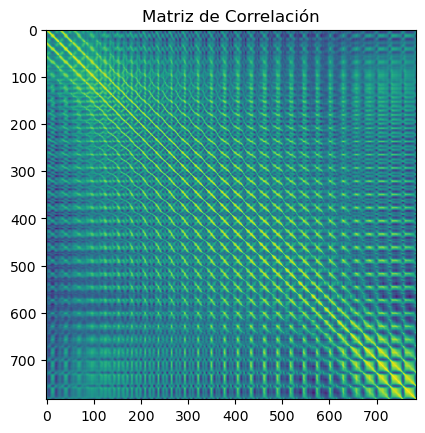

In [53]:
corr_matrix = X.corr()
plt.imshow(corr_matrix)
plt.title('Matriz de Correlación')
plt.show()

In [54]:
Z = []
P = []
for i in range (784):
  z,p = stats.pointbiserialr(X[str(i)], y)
  Z.append(z)
  P.append(p)

print(f"Number of related pixels: {np.sum(np.array(P) < (0.05/len(P)))}")

Number of related pixels: 668


## **Créditos**
---

* **Profesor:** [Fabio Augusto Gonzalez](https://dis.unal.edu.co/~fgonza/)
* **Asistente docente :**
  * [Rosa Alejandra Superlano Esquibel](https://www.linkedin.com/in/alejandrasuperlano/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](https://www.linkedin.com/in/alejandrasuperlano/).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*